In [2]:
import os
import pickle
import numpy as np
import re
import emoji
import regex

## Load dataset

In [3]:
def extract_emojis(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [76]:
# load emoji list
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/"+'mySmileys.p')
with open(fullfile, 'rb') as fp:
    emoji_list = pickle.load(fp)
print(emoji_list)
print(len(emoji_list))
target_names = emoji_list

['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😉', '😊', '😋', '😎', '😍', '😘', '😗', '😙', '😚', '☺️', '🙂', '🤗', '🤔', '😐', '😑', '😶', '🙄', '😏', '😣', '😥', '😮', '🤐', '😯', '😪', '😫', '😴', '😌', '😛', '😜', '😝', '🤤', '😒', '😓', '😔', '😕', '🙃', '🤑', '😲', '☹️', '🙁', '😖', '😞', '😟', '😤', '😢', '😭', '😦', '😧', '😨', '😩', '😬', '😰', '😱', '😳', '😵', '😡', '😠', '😷', '🤒', '🤕', '🤢', '🤧', '😇', '🤠', '🤡', '🤥', '🤓']
75


In [5]:
class tweet_data:
    pass

# D = tweet_data()
# D.raw_data = rawdata
# D.data = data
# D.raw_target = raw_target
# D.filenames = filenames
# D.numTweets = Len
# D.target_1d = target_1d
# # D.target_arr = target_arr
# D.target_names = target_names

In [63]:
# load data

fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweet_data_75x_unique_singles_target1d.p')
#'tweet_data_75x_unique_singles_target1d.p')
with open(fullfile, 'rb') as fp:
    D = pickle.load(fp)

len(D.data)

308887

In [64]:
print(D.target_names)

['😀', '😁', '😂', '🤣', '😃', '😄', '😅', '😆', '😉', '😊', '😋', '😎', '😍', '😘', '😗', '😙', '😚', '☺️', '🙂', '🤗', '🤔', '😐', '😑', '😶', '🙄', '😏', '😣', '😥', '😮', '🤐', '😯', '😪', '😫', '😴', '😌', '😛', '😜', '😝', '🤤', '😒', '😓', '😔', '😕', '🙃', '🤑', '😲', '☹️', '🙁', '😖', '😞', '😟', '😤', '😢', '😭', '😦', '😧', '😨', '😩', '😬', '😰', '😱', '😳', '😵', '😡', '😠', '😷', '🤒', '🤕', '🤢', '🤧', '😇', '🤠', '🤡', '🤥', '🤓']


In [99]:
# select subset
target_names = ['😀','😎','😶','😛','😩','😱','😷','🤓']
numEmojis = len(target_names)
print(numEmojis)

IX = [emoji_list.index(n) for n in target_names]
Len = D.numTweets

data = []
target = []
for i in range(numEmojis):
    ix = IX[i]
    i_end = (np.cumsum(Len)[ix])
    i_start = i_end - Len[ix]
    data_chunk = D.data[i_start:i_end]
    target_chunk = D.target_1d[i_start:i_end]
    data.extend(data_chunk)
    target.extend(target_chunk)
target_1d = np.array(target, dtype=int)  

8


In [100]:
print(len(data))
print(target_1d.shape)

30995
(30995,)


### Format Tweet dataset; split training/testing


In [ ]:
# this is like a struct
class tweet_train:
    pass

T = tweet_train()
T.target_names = target_names
T.data = data
#T.filenames = D.filenames
T.target = target_1d

if 0:
    # load all data
    target_names = emoji_list
    T = tweet_train()
    T.target_names = target_names
    T.data = D.data
    T.filenames = D.filenames
    T.target = D.target_1d#target

In [152]:
# fullfile = os.path.expanduser("~/Dropbox/insight/Twitter/"+'tweet_train_2x5k.p')
# with open(fullfile, 'rb') as fp:
#     T = pickle.load(fp)


In [147]:
T.target_names = target_names
print(T.target_names[T.target[0]])

😀


In [149]:
# Split the dataset in training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    T.data, T.target, test_size=0.2,random_state=0)

In [150]:
len(y_test)

61778

## Training a classifier: Logistic Regression

In [106]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import Perceptron
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [155]:
# this one used for the 8-way model:
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', 
#                              use_idf=True)
vectorizer = TfidfVectorizer(ngram_range=(1,1), analyzer='word', min_df=6,
                             use_idf=True)

In [158]:
XV_train = vectorizer.fit_transform(X_train)
XV_train.shape

(247109, 15207)

In [161]:
# this one used for the 8-way model:
# clf = LogisticRegression(random_state=0, solver='lbfgs',
#                          multi_class='ovr')
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='ovr',verbose=1, tol=0.001) #'multinomial')
clf.fit(XV_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/xiuye/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/xiuye/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/xiuye/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/xiuye/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/xiuye/anaconda3/envs

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.001, verbose=1, warm_start=False)

In [162]:
XV_test = vectorizer.transform(X_test)

In [163]:
y_predicted = clf.predict(XV_test)

In [164]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=T.target_names))

              precision    recall  f1-score   support

           😀       0.12      0.06      0.08       707
           😁       0.06      0.03      0.04       922
           😂       0.08      0.14      0.10       993
           🤣       0.06      0.01      0.01       519
           😃       0.11      0.09      0.10       786
           😄       0.08      0.03      0.05       800
           😅       0.04      0.02      0.02       761
           😆       0.11      0.03      0.05       662
           😉       0.06      0.07      0.07       761
           😊       0.13      0.14      0.14       912
           😋       0.20      0.21      0.20       820
           😎       0.16      0.21      0.18       808
           😍       0.11      0.22      0.15       913
           😘       0.14      0.23      0.18       759
           😗       0.09      0.01      0.03       405
           😙       0.15      0.10      0.12       850
           😚       0.13      0.13      0.13       635
          ☺️       0.12    

In [165]:
clf.coef_.shape

(75, 15207)

In [166]:
preds = clf.predict_proba(XV_test)
preds.shape

(61778, 75)

In [167]:
# convert y_test into same shape as preds
IX = [emoji_list.index(n) for n in target_names]

truths = np.zeros((len(y_test), len(target_names)))
for i in range(len(y_test)):
    j = IX.index(y_test[i])
    truths[i,j] = 1
truths.shape

(61778, 75)

In [168]:
#both preds and truths are same shape m by n (m is number of predictions and n is number of classes)
def top_n_accuracy(preds, truths, n):
    best_n = np.argsort(preds, axis=1)[:,-n:]
    ts = np.argmax(truths, axis=1)
    successes = 0
    for i in range(ts.shape[0]):
        if ts[i] in best_n[i,:]:
            successes += 1
    return float(successes)/ts.shape[0]
# https://stackoverflow.com/questions/32461246/how-to-get-top-3-or-top-n-predictions-using-sklearns-sgdclassifier

In [169]:
top_n_accuracy(preds, truths, 3)

0.21684094661529996

In [ ]:
numEmojis = 75
x = np.array(range(1,numEmojis+1))
y = [top_n_accuracy(preds, truths, i) for i in range(1,numEmojis+1)]

plt.rcParams.update({'font.size': 22})

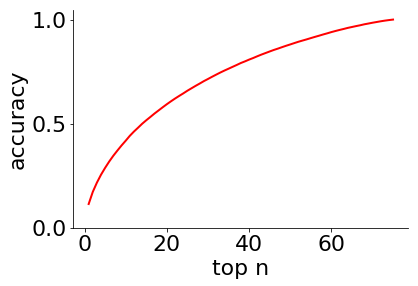

In [172]:
fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

plt.xlabel('top n')
plt.ylabel('accuracy')
# plt.figtext(0.9, 0.05, '$x$')
# plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

# a,b = 1,4
# ax.set_xticks((a, b, numEmojis))
# ax.set_xticklabels((str(a), str(b), str(numEmojis)))
# ax.set_yticks([])

plt.show()
fig.savefig('top_n_accuracy_75x.png',bbox_inches='tight')

In [145]:
# save model
fullfile = os.path.expanduser("~/Dropbox/insight_datadir/"+'clf_2step_8way_1002.p')
with open(fullfile, 'wb') as fp:
    pickle.dump([vectorizer,clf], fp)


## Word cloud

In [36]:
to_sort = clf.coef_[2]
to_sort.shape

feature_names = vectorizer.get_feature_names()

IX = np.argsort(to_sort)[-50:] # -50: largest values

wordsList = []
for ii in range(len(IX)):
    wordsList.append(feature_names[IX[ii]])
print(wordsList)

# ix = wordsList.index("fucking")
# wordsList[ix] = 'f*cking'
# print(wordsList)

['everybody', 'now', 'men', 'bored', 'tell', 'did', 'money', 'like', 'mean', 'whatever', 'ass', 'the', 'fucking', 'when', 'all', 'it', 'you', 'guess', 'he', 'get', 'yeah', 'tired of', 'class', 'why', 'monday', 'be', 'sure', 'then', 'doesn', 'phone', 'stupid', 'should', 'duh', 'obviously', 'to', 'or', 'but', 'because', 'lol', 'didn', 'they', 'what', 'work', 'annoying', 'no', 'that', 'don', 'people', 'hate', 'not']
['everybody', 'now', 'men', 'bored', 'tell', 'did', 'money', 'like', 'mean', 'whatever', 'ass', 'the', 'f*cking', 'when', 'all', 'it', 'you', 'guess', 'he', 'get', 'yeah', 'tired of', 'class', 'why', 'monday', 'be', 'sure', 'then', 'doesn', 'phone', 'stupid', 'should', 'duh', 'obviously', 'to', 'or', 'but', 'because', 'lol', 'didn', 'they', 'what', 'work', 'annoying', 'no', 'that', 'don', 'people', 'hate', 'not']


In [37]:
# make word cloud input
K = wordsList
V = abs(np.sort(to_sort)[:50])
d = {}
for ii in range(50):
    k = K[ii]
    v = V[ii]
    d[k] = v

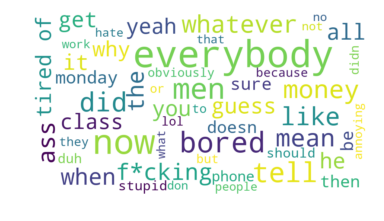

In [42]:
# wordcloud = WordCloud(background_color="white",width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)
wordcloud = WordCloud(background_color="white",width=900,height=500,max_font_size=100).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("eye_roll_words.png")

In [ ]:
arr1 = np.array([0,1,2], dtype=float)
print(arr1)
arr2 = np.array([1,-1,0], dtype=float)
print(arr2)
np.dot(arr1, arr2)

In [102]:
metrics.accuracy_score(y_test, y_predicted)

0.8193333333333334

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.


F1 = 2 * (precision * recall) / (precision + recall) 
https://github.com/scikit-learn/scikit-learn/blob/f0ab589f/sklearn/metrics/classification.py#L1363

In [28]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[877  97]
 [131 895]]


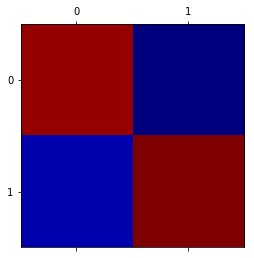

In [29]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [26]:
# Predict the result on some short new sentences:
sentences = [
    u'lovely definition: 1. pleasant or enjoyable: 2. beautiful:',
    u'Hate speech is a communication that carries no meaning other than the expression of hatred for some group',
    u'amazing wow love this!!!',
]
predicted = clf.predict(sentences)

In [27]:
output = []
for ii in predicted:
    output.append(T.target_names[ii])
print(output)

['😍', '😡', '😍']


In [ ]:
# save model
fullfile = os.path.expanduser("~/Dropbox/insight_datadir/Webapp_data/"+'clf_0930.p')
with open(fullfile, 'wb') as fp:
    pickle.dump(clf, fp)

In [ ]:
docs_new = ['God is love', 'what have you done!','Oh yeah? don''t try to trick me']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf1.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, T.target_names[category]))